In [ ]:
# importation des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/loan-train.csv')

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 1. Exploratory Data Analysis

## Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation 

## Checklist de base
#### Analyse de Forme :
- **variable target** : Loan_Status
- **lignes et colonnes** : (614, 13)
- **types de variables** : qualitatives(8), quantitatives(5)
- **Analyse des valeurs manquantes** :
  - très peu de NaN
  - max de NaN seulement 8% (Credit History) -> valeur importante
   

#### Analyse de Fond :
- **Visualisation de la target** :
  - Seulement 68 % de crédit accépté et 32% non accépté
 
    
    
    
- **Signification des variables** :

  - quantitatives :
    - LoanAmount suit une loi Normale, mais les autres non
    - Loan_amount_term est généralement = à 360, qu'est ce que ça veut dire ? 360 mois = 30 ans donc je pense que ce sont des prêts sur 30 ans 
    - 57 % non pas de personnes à charge et le reste à une personne ou plus 
  
  - qualitatives : 
    - quelques variables binaires comme Gender, Married, Education et Self_Employed
    - on remarque qu'il y a beaucoup plus d'hommes que de femmes



- **Relation Variables / Target** :

  - Target/Female :
    - Moins les femmes ont de personnes à charges plus elles peuvent voir leur crédit accépté
    - Forte influence du Co-applicant sur l'acceptation du crédit -> voir à partir de combien (à 2) le crédit est accépté
  
  - Target/Male : 
    - Hommes mariés avec un diplôme et pas de personnes à charge donne un avantage
  
    
  
    
    
    
## Analyse plus détaillée

- **Relation Variables / Variables** :
  - 
   


- **NaN analyse** : 

### hypotheses nulle (H0): 


    

# Analyse de Forme

In [ ]:
df = data.copy()

In [ ]:
df.shape

(614, 13)

In [ ]:
df.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

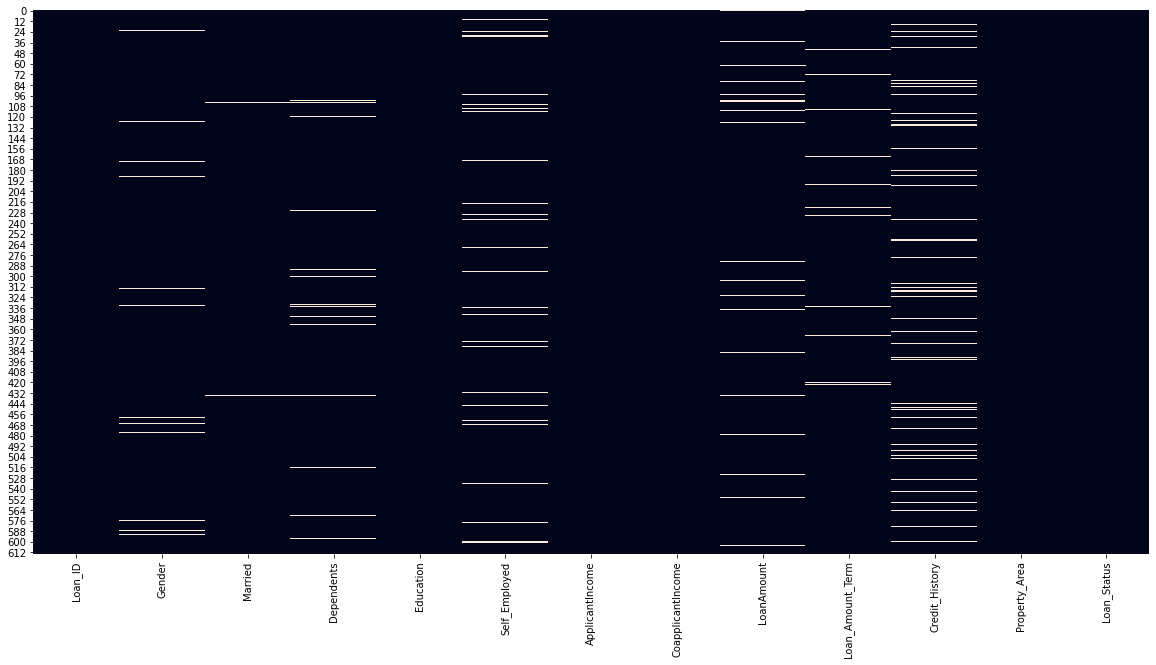

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [ ]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

Credit_History       0.081433
Self_Employed        0.052117
LoanAmount           0.035831
Dependents           0.024430
Loan_Amount_Term     0.022801
Gender               0.021173
Married              0.004886
Loan_Status          0.000000
Property_Area        0.000000
CoapplicantIncome    0.000000
ApplicantIncome      0.000000
Education            0.000000
Loan_ID              0.000000
dtype: float64

# Analyse de fond

### Variable Target


In [ ]:
df = df.drop('Loan_ID', axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Quantitatives


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

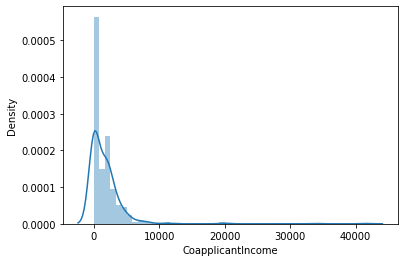

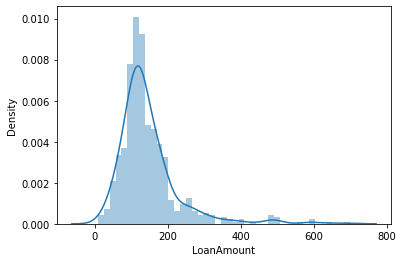

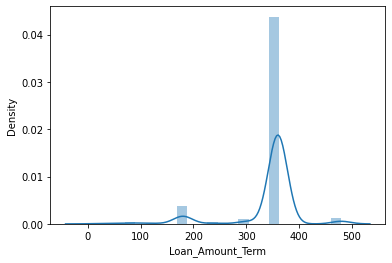

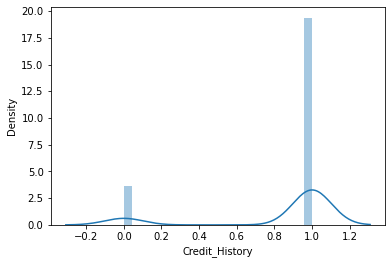

In [ ]:
for col in df.select_dtypes('float'):
  plt.figure()
  sns.distplot(df[col])

In [ ]:
df['Dependents'].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

### Qualitatives

In [ ]:
for col in df.select_dtypes('object'):
  plt.figure()
  print(f'{col :-<50} {df[col].unique()}')

Gender-------------------------------------------- ['Male' 'Female' nan]
Married------------------------------------------- ['No' 'Yes' nan]
Dependents---------------------------------------- ['0' '1' '2' '3+' nan]
Education----------------------------------------- ['Graduate' 'Not Graduate']
Self_Employed------------------------------------- ['No' 'Yes' nan]
Property_Area------------------------------------- ['Urban' 'Rural' 'Semiurban']
Loan_Status--------------------------------------- ['Y' 'N']


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

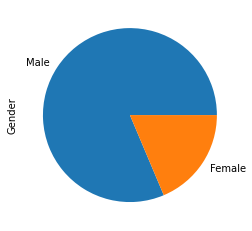

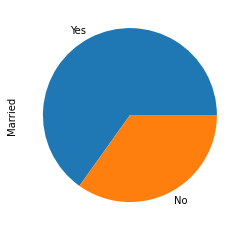

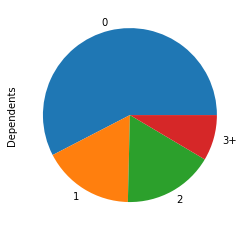

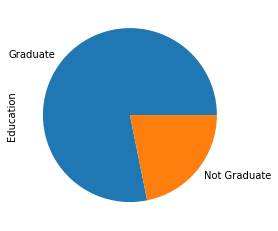

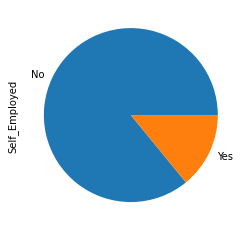

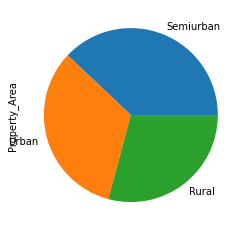

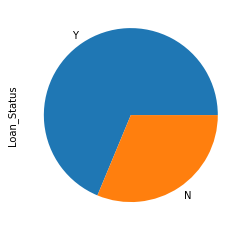

In [ ]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

In [ ]:
df = df.drop('Property_Area', axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Y


# création d'un dictionnaire pour remplacer les variables qualitatives


In [ ]:
dictionnary = {'Female':int(0),
        'Male': int(1),
        'No':int(0),
        'Yes':int(1),
        'Graduate':int(1),
        'Not Graduate':int(0),
        '0':int(0),
        '1':int(1),
        '2':int(2),
        '3+':int(3),
        'Y':int(1),
        'N':int(0)}


for col in df.select_dtypes('object').columns:
  df[col].replace(dictionnary, inplace=True)

df
  

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,1
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,1
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,1


### Relation Target / Variables

Création de sous-ensembles positifs et négatifs

In [ ]:
positif_df = df[df['Loan_Status'] == 1]
negatif_df = df[df['Loan_Status'] == 0]

Création des sous-ensembles positifs et négatifs pour Female et Male


In [ ]:
female_df = df[df['Gender'] == 0.0]
male_df = df[df['Gender'] == 1.0]

positif_female_df = positif_df[positif_df['Gender'] == 0.0]
negatif_female_df = negatif_df[negatif_df['Gender'] == 0.0]
positif_male_df = positif_df[positif_df['Gender'] == 1.0]
negatif_male_df = negatif_df[negatif_df['Gender'] == 1.0]

female_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
17,0.0,0.0,0.0,1,0.0,3510,0.0,76.0,360.0,0.0,0
29,0.0,0.0,2.0,1,NaN,3750,2083.0,120.0,360.0,1.0,1
37,0.0,1.0,0.0,1,0.0,3667,1459.0,144.0,360.0,1.0,1
45,0.0,0.0,0.0,1,0.0,3410,0.0,88.0,NaN,1.0,1
48,0.0,1.0,0.0,1,0.0,2645,3440.0,120.0,360.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
587,0.0,0.0,0.0,0,0.0,2165,0.0,70.0,360.0,1.0,1
600,0.0,0.0,3.0,1,NaN,416,41667.0,350.0,180.0,NaN,0
604,0.0,1.0,1.0,1,0.0,12000,0.0,496.0,360.0,1.0,1
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,1


### Target / Female


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate

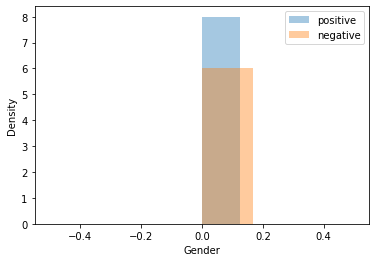

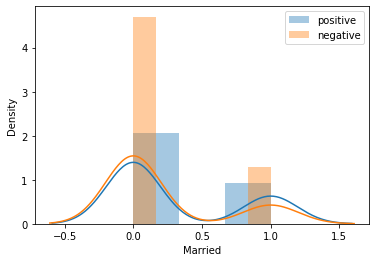

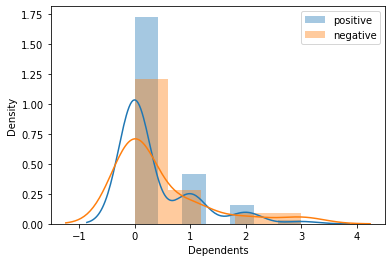

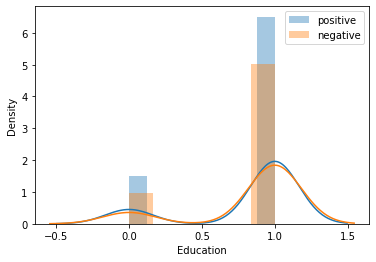

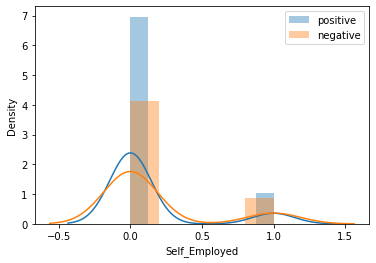

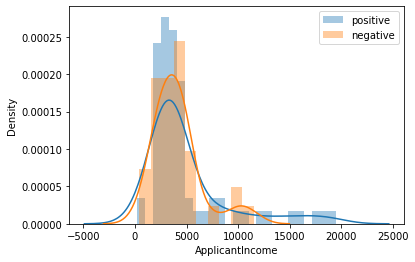

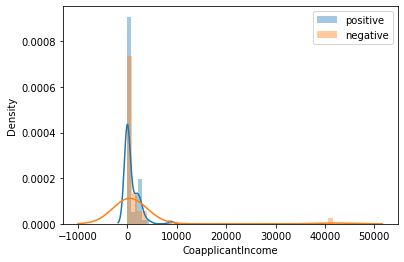

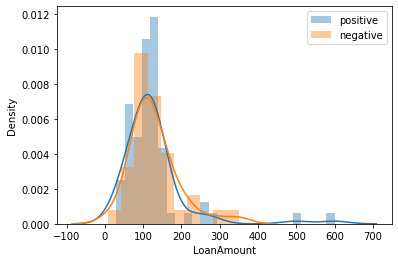

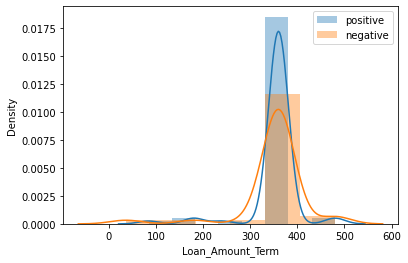

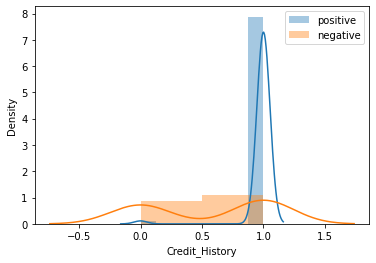

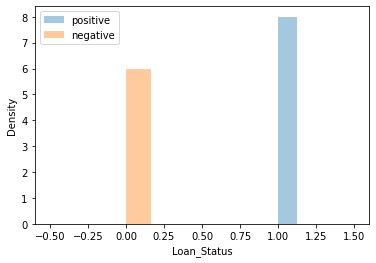

In [ ]:
for col in female_df.columns:
  plt.figure()
  sns.distplot(positif_female_df[col], label='positive')
  sns.distplot(negatif_female_df[col], label='negative')
  plt.legend()

### Target/Male

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate

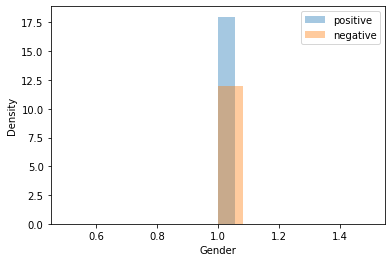

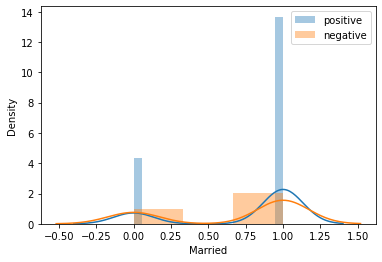

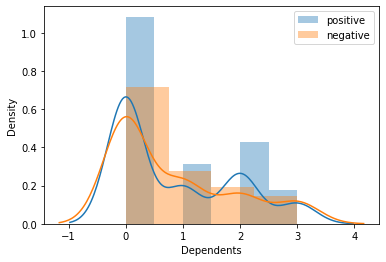

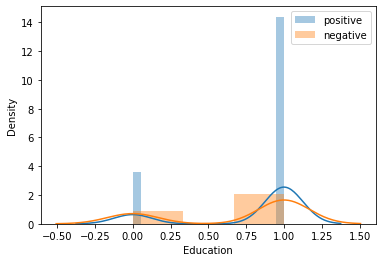

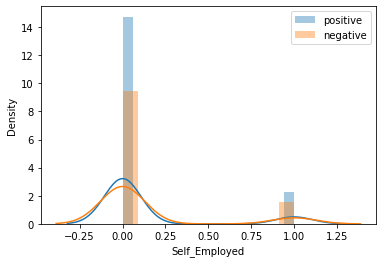

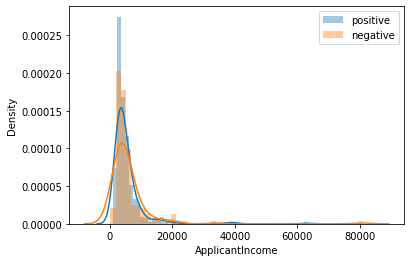

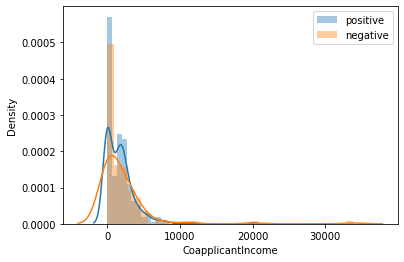

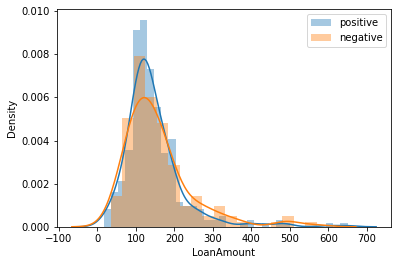

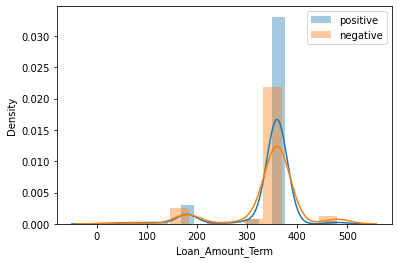

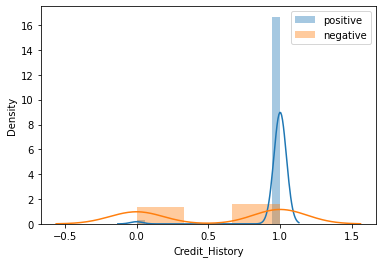

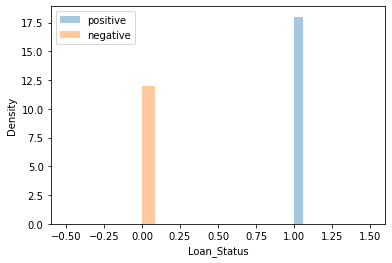

In [ ]:
for col in male_df.columns:
  plt.figure()
  sns.distplot(positif_male_df[col], label='positive')
  sns.distplot(negatif_male_df[col], label='negative')
  plt.legend()